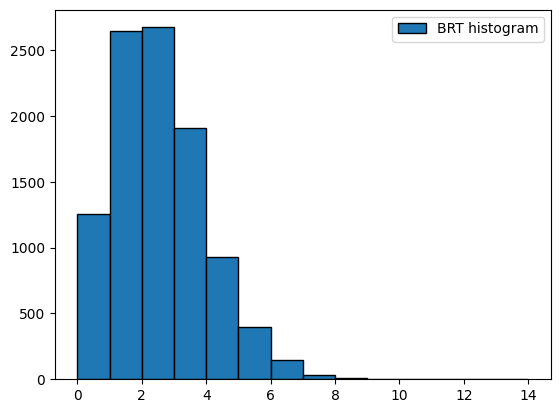

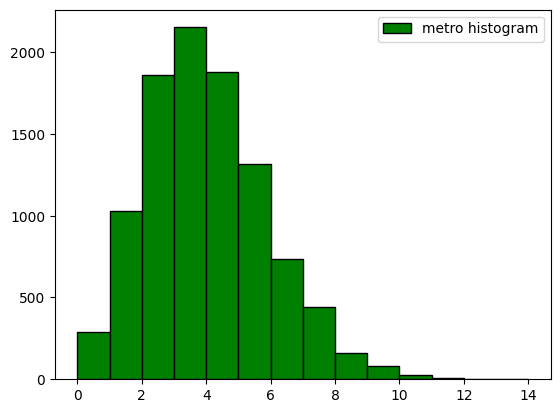

In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

data = pd.read_csv("Tarbiat.csv")
baze_test = np.arange(0 , 15, 1)
fig1,ax1 = plt.subplots()
ax1.hist(data['BRT'], baze_test,edgecolor="black", label="BRT histogram")
ax1.legend()
fig2,ax2 = plt.subplots()
ax2.hist(data['metro'], baze_test,edgecolor="black", label="metro histogram", color="green")
ax2.legend()
plt.show()

In [55]:
miangin_BRT = data['BRT'].sum() / data['BRT'].count()
print(f"for BRT the poisson parameter is {miangin_BRT}")
miangin_metro = data['metro'].sum() / data['metro'].count()
print(f"for metro the poisson parameter is {miangin_metro}")

for BRT the poisson parameter is 2.0636
for metro the poisson parameter is 3.5316


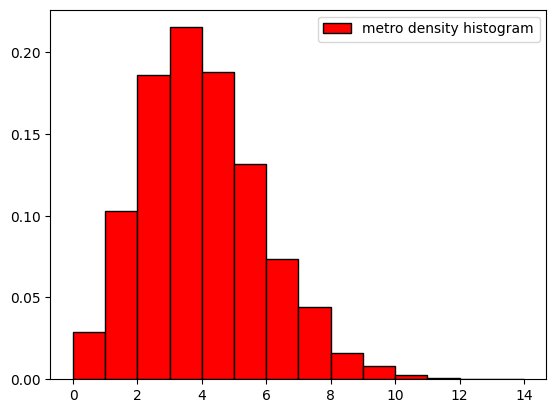

In [56]:
fig3,ax3 = plt.subplots()
ax3.hist(data['metro'], baze_test,edgecolor="black", label="metro density histogram", color="red",density=True)
ax3.legend()
plt.show()

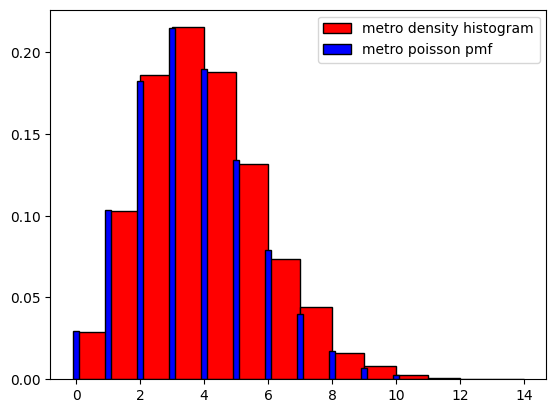

In [57]:
x = np.arange(stats.poisson.ppf(0.01, miangin_metro), stats.poisson.ppf(0.99, miangin_metro) + 2)
metro_pmf = stats.poisson.pmf(x, miangin_metro)
fig4,ax4 = plt.subplots()
ax4.hist(data['metro'], baze_test,edgecolor="black", label="metro density histogram", color="red",density=True)
ax4.bar(x, metro_pmf, edgecolor="black", label="metro poisson pmf",color="blue", width= 0.2)
plt.legend()
plt.show()

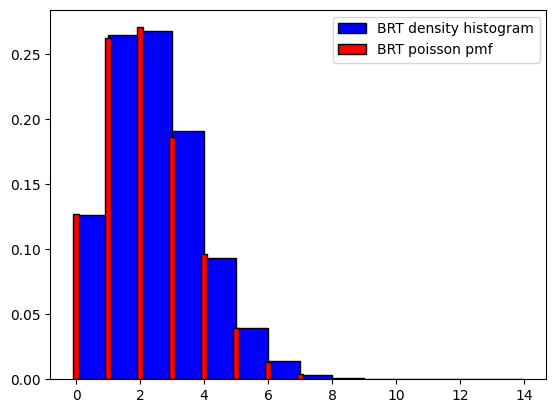

In [58]:
x = np.arange(stats.poisson.ppf(0.01, miangin_BRT), stats.poisson.ppf(0.99, miangin_BRT) + 2)
metro_pmf = stats.poisson.pmf(x, miangin_BRT)
fig5,ax5 = plt.subplots()
ax5.hist(data['BRT'], baze_test,edgecolor="black", label="BRT density histogram", color="blue",density=True)
ax5.bar(x, metro_pmf, edgecolor="black", label="BRT poisson pmf",color="red", width= 0.2)
plt.legend()
plt.show()

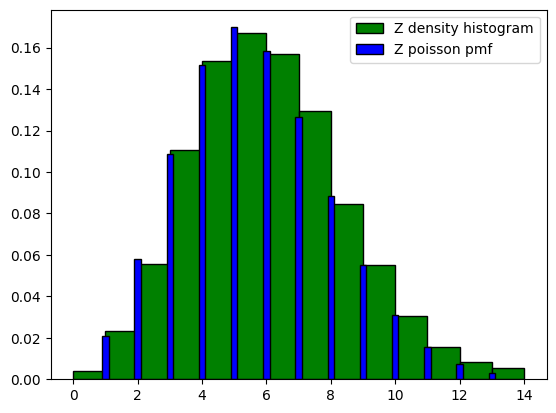

In [59]:
tozie_Z = data.sum(axis=1)
miangin_Z = miangin_metro + miangin_BRT
x = np.arange(stats.poisson.ppf(0.01, miangin_Z), stats.poisson.ppf(0.99, miangin_Z) + 2)
Z_pmf = stats.poisson.pmf(x, miangin_Z)
fig6,ax6 = plt.subplots()
ax6.hist(tozie_Z, baze_test,edgecolor="black", label="Z density histogram", color="green",density=True)
ax6.bar(x, Z_pmf, edgecolor="black", label="Z poisson pmf",color="blue", width= 0.2)
plt.legend()
plt.show()

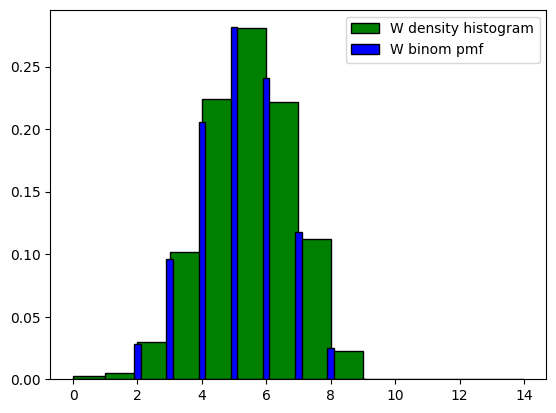

In [61]:
n = 8   
W_parameter = miangin_metro / miangin_Z
x = np.arange(stats.binom.ppf(0.01, n, W_parameter), stats.binom.ppf(0.99, n, W_parameter) + 2)
W_pmf = stats.binom.pmf(x, n, W_parameter)
tozie_W = data['metro'][data['BRT'] + data['metro'] == n]

fig7,ax7 = plt.subplots()
ax7.hist(tozie_W, baze_test,edgecolor="black", label="W density histogram", color="green",density=True)
ax7.bar(x, W_pmf, edgecolor="black", label="W binom pmf",color="blue", width= 0.2)
plt.legend()
plt.show()
